In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/User/OneDrive/Escritorio/Analisis de Ventas/datos/datos_ventas.csv")
df["Fecha"] = pd.to_datetime(df["Fecha"])
df["Mes"] = df["Fecha"].dt.month_name()
df["Dia"] = df["Fecha"].dt.day_name()

In [3]:
df.head()

,Fecha,Producto,Precio,Cantidad,Ciudad,Metodo de pago,Mes,Dia
0,2024-12-09,Zapatos,129.94,2,Jujuy,Efectivo,December,Monday
1,2024-07-29,Zapatos,29.49,2,Buenos Aires,Efectivo,July,Monday
2,2024-04-26,Camiseta,178.55,2,Neuquen,Tarjeta de crédito,April,Friday
3,2024-09-02,Smartphone,389.65,2,Santa Fe,Tarjeta de crédito,September,Monday
4,2024-09-22,Laptop,326.69,5,Tierra del Fuego,Efectivo,September,Sunday


In [4]:
df.shape

(5236, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236 entries, 0 to 5235
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           5236 non-null   datetime64[ns]
 1   Producto        5236 non-null   object        
 2   Precio          5236 non-null   float64       
 3   Cantidad        5236 non-null   int64         
 4   Ciudad          5236 non-null   object        
 5   Metodo de pago  5236 non-null   object        
 6   Mes             5236 non-null   object        
 7   Dia             5236 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 327.4+ KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

Fecha             0
Producto          0
Precio            0
Cantidad          0
Ciudad            0
Metodo de pago    0
Mes               0
Dia               0
dtype: int64

In [8]:
df.describe().round(2)

,Fecha,Precio,Cantidad
count,5236,5236.00,5236.00
mean,2024-07-09 00:03:34.514896896,255.52,3.01
min,2024-01-09 00:00:00,10.04,1.00
25%,2024-04-08 00:00:00,136.71,2.00
50%,2024-07-08 00:00:00,256.29,3.00
75%,2024-10-07 00:00:00,375.81,4.00
max,2025-01-08 00:00:00,499.86,5.00
std,NaN,140.16,1.42


In [9]:
df.head(4)

,Fecha,Producto,Precio,Cantidad,Ciudad,Metodo de pago,Mes,Dia
0,2024-12-09,Zapatos,129.94,2,Jujuy,Efectivo,December,Monday
1,2024-07-29,Zapatos,29.49,2,Buenos Aires,Efectivo,July,Monday
2,2024-04-26,Camiseta,178.55,2,Neuquen,Tarjeta de crédito,April,Friday
3,2024-09-02,Smartphone,389.65,2,Santa Fe,Tarjeta de crédito,September,Monday


### Exploratory Data Analysis

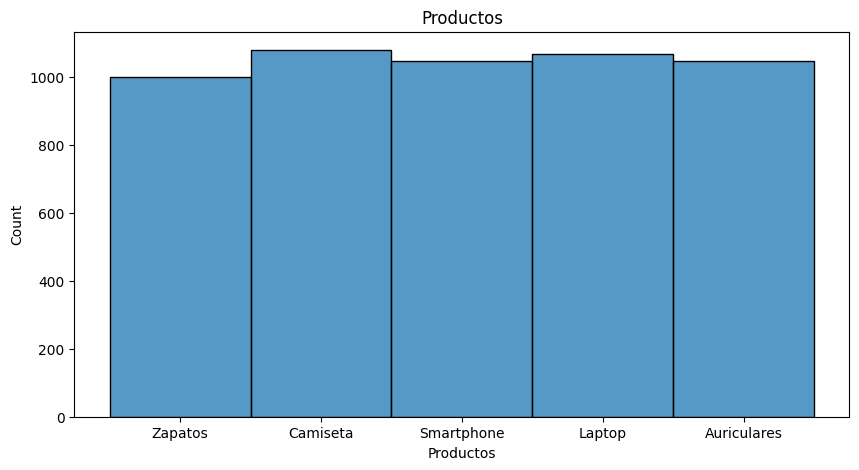

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Producto", bins=5, kde=False)
plt.title("Productos")
plt.xlabel("Productos")
plt.show()

---------------

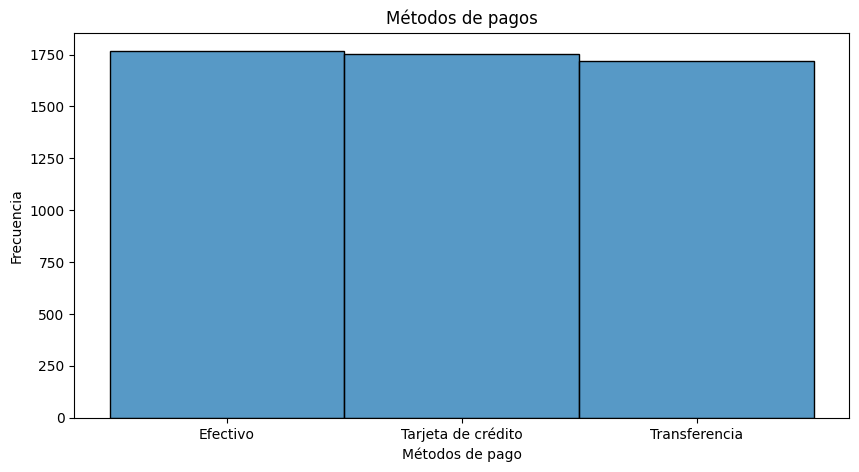

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Metodo de pago")
plt.title("Métodos de pagos")
plt.xlabel("Métodos de pago")
plt.ylabel("Frecuencia")
plt.show()

------------------

In [20]:
ventas_por_producto = df.groupby('Producto')['Cantidad'].sum().sort_values(ascending=False)
ventas_por_producto_df = ventas_por_producto.reset_index()

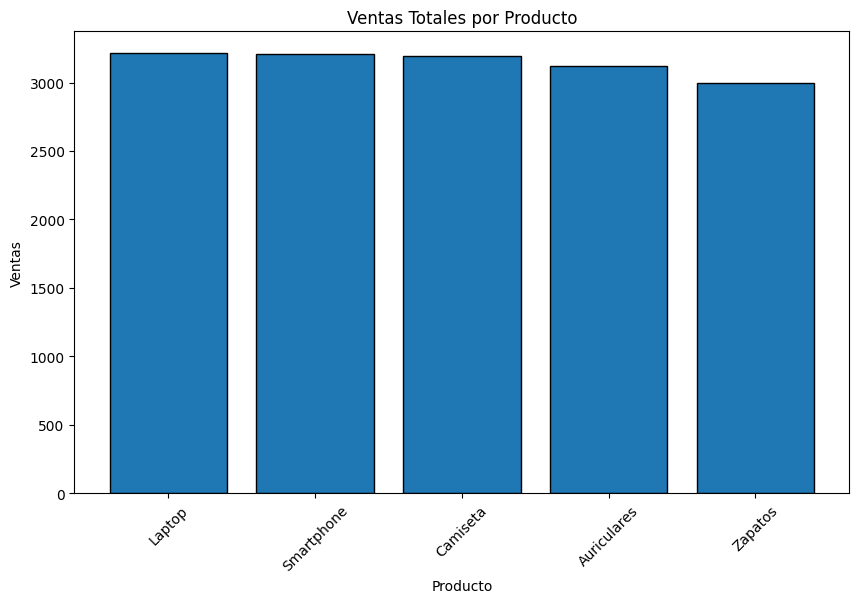

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_producto_df['Producto'], ventas_por_producto_df['Cantidad'], edgecolor='black')
plt.title('Ventas Totales por Producto')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.show()

-------------------

In [24]:
ingresos_por_ciudad = df.groupby('Ciudad')['Precio'].sum().sort_values(ascending=False)
ingresos_por_ciudad_df = ingresos_por_ciudad.reset_index()

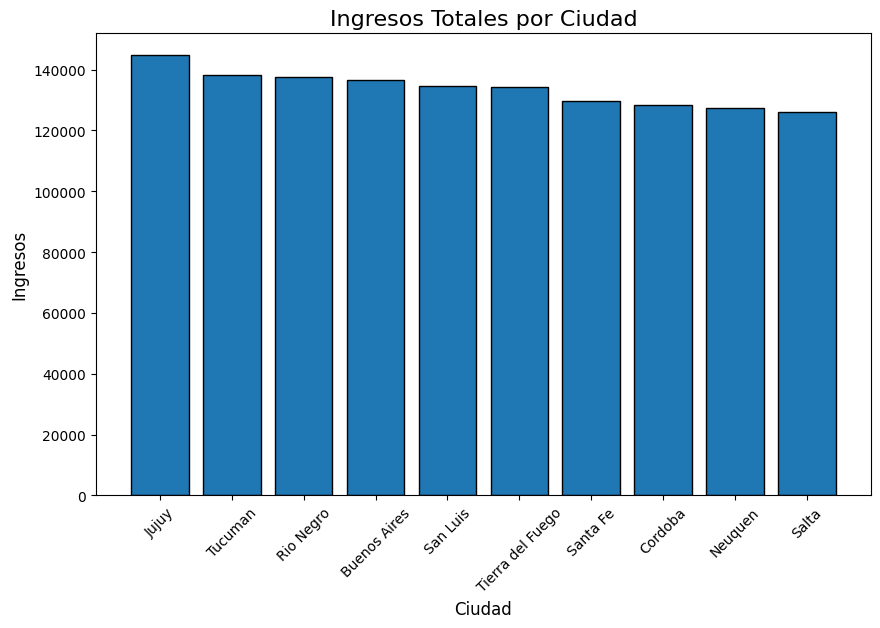

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(ingresos_por_ciudad_df['Ciudad'], ingresos_por_ciudad_df['Precio'], edgecolor='black')
plt.title('Ingresos Totales por Ciudad', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Ingresos', fontsize=12)
plt.xticks(rotation=45)
plt.show()

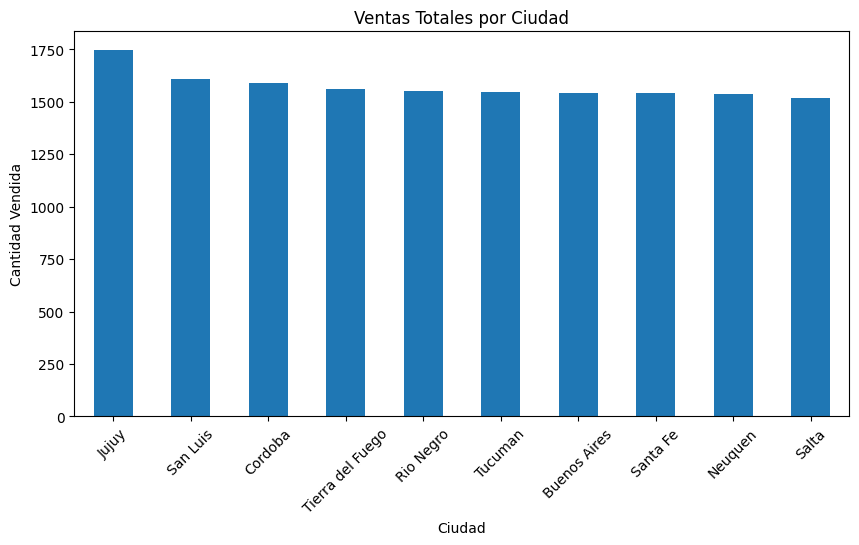

In [ ]:
ventas_por_ciudad = df.groupby('Ciudad')['Cantidad'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
ventas_por_ciudad.plot(kind='bar')
plt.title('Ventas Totales por Ciudad')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.show()


-----------------------

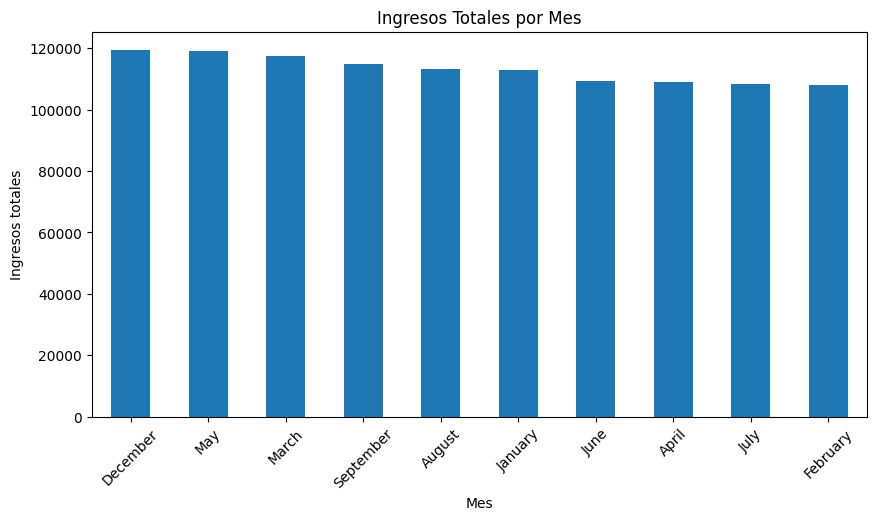

In [24]:
ingresos_por_mes = df.groupby('Mes')['Precio'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
ingresos_por_mes.head(10).plot(kind='bar')
plt.title('Ingresos Totales por Mes')
plt.ylabel('Ingresos totales')
plt.xticks(rotation=45)
plt.show()

----------------

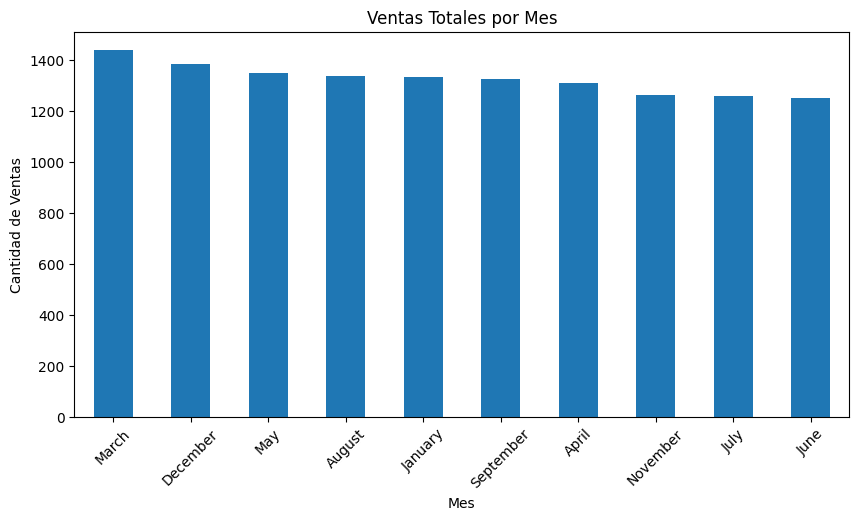

In [18]:
precios_por_producto = df.groupby('Mes')['Cantidad'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
precios_por_producto.head(10).plot(kind='bar')
plt.title('Ventas Totales por Mes')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.show()

------------------------

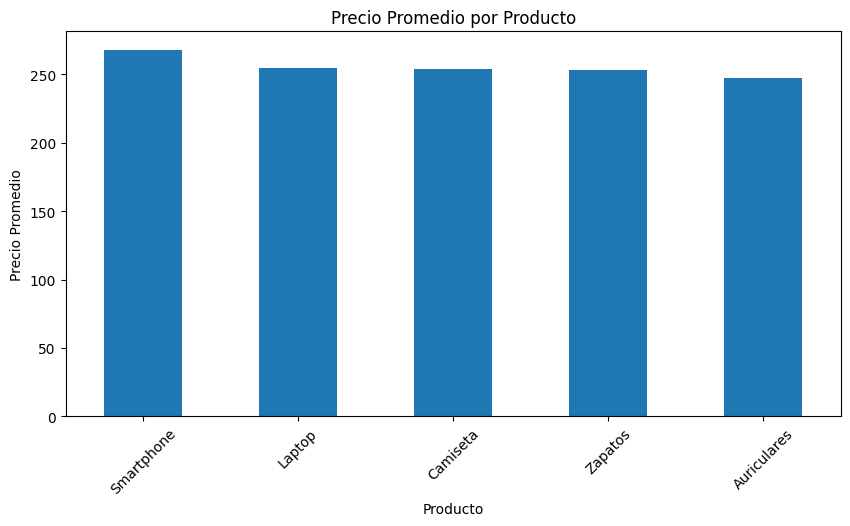

In [ ]:
precios_por_producto = df.groupby('Producto')['Precio'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
precios_por_producto.head(10).plot(kind='bar')
plt.title('Precio Promedio por Producto')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.show()

-------------------------------------------------

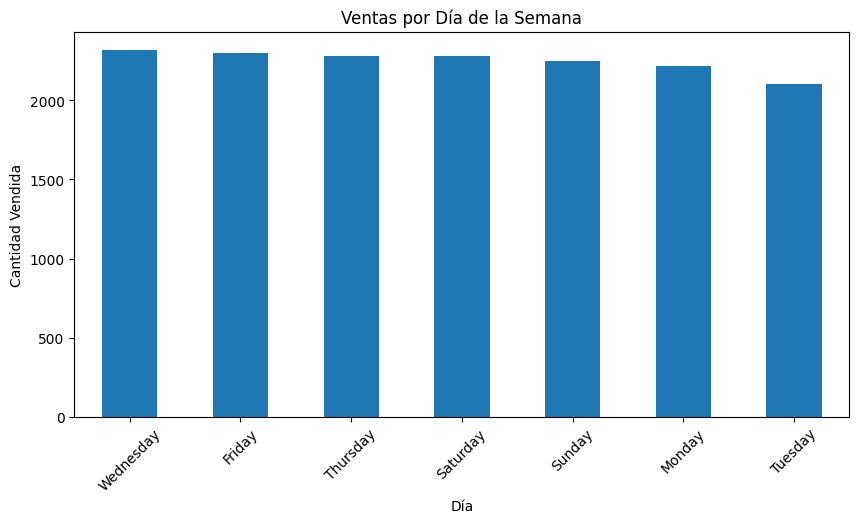

In [ ]:
ventas_por_dia = df.groupby('Dia')['Cantidad'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
ventas_por_dia.plot(kind='bar')
plt.title('Ventas por Día de la Semana')
plt.xlabel('Día')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.show()

----------------------------

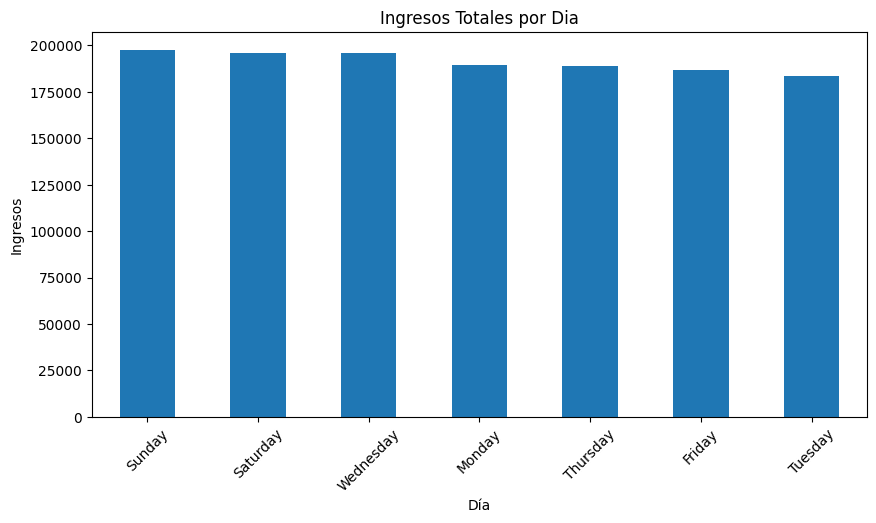

In [22]:
ingresos_por_dia = df.groupby('Dia')['Precio'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
ingresos_por_dia.plot(kind='bar')
plt.title('Ingresos Totales por Dia')
plt.xlabel('Día')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.show()